In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")

In [38]:
df = pd.read_csv('d:\\Src\\health-des\\logs\\queue-stats-2017-02-07-21-20-41.csv')  # without queue
df['PART_PERC'] = df.PART * 100
df.head()

,Unnamed: 0,BG_SCALE,Q3,MIN,MAX,N_SURG,Q1,PART,Q2,TARGET_SCALE,MAX_QUEUE_LENGTH,AVG,PART_PERC
0,0,0.5,1087.9,50.0,2651.0,1,59.1,0.208333,232.0,0.5,4.0,682.800000,20.833333
1,1,0.5,53.0,6.0,118.0,1,16.2,0.204545,21.0,0.5,2.0,38.666667,20.454545
2,2,0.5,732.2,27.0,829.0,1,90.6,0.100000,345.0,0.5,6.0,400.333333,10.000000
3,3,0.5,157.7,25.0,234.0,1,45.3,0.147059,56.0,0.5,2.0,98.800000,14.705882
4,4,0.5,103.0,95.0,103.0,1,95.0,0.055556,99.0,0.5,1.0,99.000000,5.555556


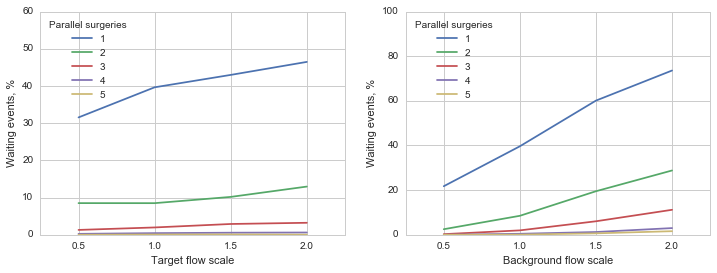

In [28]:
x = df[df.N_SURG == 1].sort_values('TARGET_SCALE').TARGET_SCALE.unique()
plt.figure(figsize=(12,4))
plt.subplot(121)
for ns in df.N_SURG.unique():
    plt.plot(x, df[(df.N_SURG == ns) & (df.BG_SCALE == 1.0)].groupby('TARGET_SCALE')['PART_PERC'].mean(), label=str(ns))
plt.xlabel('Target flow scale')
plt.ylabel('Waiting events, %')
plt.xlim((0.25,2.25))
plt.ylim((0,60))
plt.legend(loc=2, title='Parallel surgeries')
plt.subplot(122)
for ns in df.N_SURG.unique():
    plt.plot(x, df[(df.N_SURG == ns) & (df.TARGET_SCALE == 1.0)].groupby('BG_SCALE')['PART_PERC'].mean(), label=str(ns))
plt.xlabel('Background flow scale')
plt.ylabel('Waiting events, %')
plt.xlim((0.25,2.25))
plt.ylim((0,100))
plt.legend(loc=2, title='Parallel surgeries')

[None]

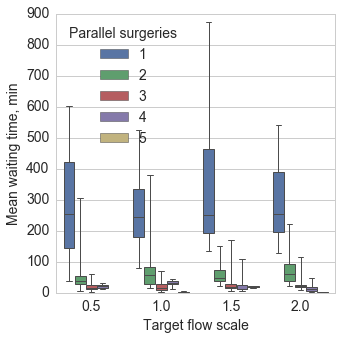

In [50]:
plt.figure(figsize=(5,5))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ff = (df.BG_SCALE == 1) & (df.N_SURG > 0)
sns.boxplot(x='TARGET_SCALE', y='AVG', data=df[ff], hue='N_SURG', width=0.8, linewidth=1, whis='range')
plt.xlabel('Target flow scale', fontsize=14)
plt.ylabel('Mean waiting time, min', fontsize=14)
# plt.ylim((0, 500))
lgd = plt.legend(loc=2, title='Parallel surgeries', fontsize=14)
plt.setp(lgd.get_title(), fontsize=14)

[None]

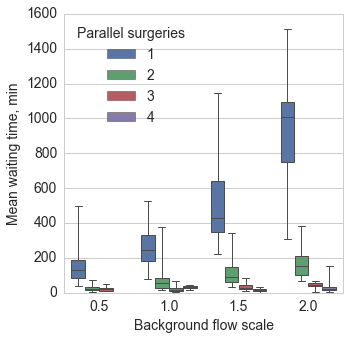

In [57]:
plt.figure(figsize=(5,5))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ff = (df.TARGET_SCALE == 1) & (df.N_SURG < 5)
sns.boxplot(x='BG_SCALE', y='AVG', data=df[ff], hue='N_SURG', width=0.8, linewidth=1, whis='range')
plt.xlabel('Background flow scale', fontsize=14)
plt.ylabel('Mean waiting time, min', fontsize=14)
# plt.ylim((0, 500))
lgd = plt.legend(loc=2, title='Parallel surgeries', fontsize=14)
plt.setp(lgd.get_title(), fontsize=14)

[None]

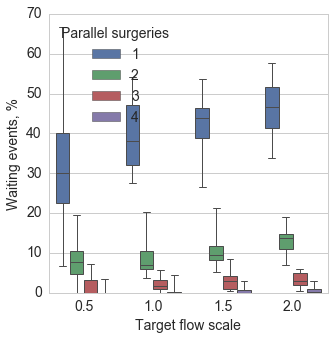

In [56]:
plt.figure(figsize=(5,5))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ff = (df.BG_SCALE == 1) & (df.N_SURG < 5)
sns.boxplot(x='TARGET_SCALE', y='PART_PERC', data=df[ff], hue='N_SURG', width=0.8, linewidth=1, whis='range')
plt.xlabel('Target flow scale', fontsize=14)
plt.ylabel('Waiting events, %', fontsize=14)
# plt.ylim((0,100))
lgd = plt.legend(loc=2, title='Parallel surgeries', fontsize=14)
plt.setp(lgd.get_title(),fontsize=14)

[None]

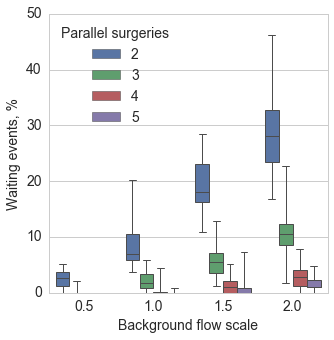

In [54]:
plt.figure(figsize=(5,5))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ff = (df.TARGET_SCALE == 1) & (df.N_SURG > 1)
sns.boxplot(x='BG_SCALE', y='PART_PERC', data=df[ff], hue='N_SURG', width=0.8, linewidth=1, whis='range')
plt.xlabel('Background flow scale', fontsize=14)
plt.ylabel('Waiting events, %', fontsize=14)
# plt.ylim((0,100))
lgd = plt.legend(loc=2, title='Parallel surgeries', fontsize=14)
plt.setp(lgd.get_title(),fontsize=14)

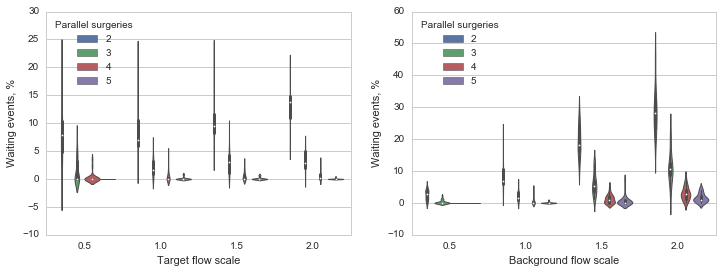

In [43]:
plt.figure(figsize=(12,4))
plt.subplot(121)
ff = (df.BG_SCALE == 1) & (df.N_SURG > 1)
sns.violinplot(x='TARGET_SCALE', y='PART_PERC', data=df[ff], hue='N_SURG', linewidth=1)
plt.xlabel('Target flow scale')
plt.ylabel('Waiting events, %')
# plt.ylim((0,100))
plt.legend(loc=2, title='Parallel surgeries')
plt.subplot(122)
ff = (df.TARGET_SCALE == 1) & (df.N_SURG > 1)
sns.violinplot(x='BG_SCALE', y='PART_PERC', data=df[ff], hue='N_SURG', linewidth=1)
plt.xlabel('Background flow scale')
plt.ylabel('Waiting events, %')
# plt.ylim((0,100))
plt.legend(loc=2, title='Parallel surgeries')